 <h2> Loading the necessary libraries <h2> 

In [1]:
import pandas as py# type: ignore
import matplotlib.pyplot as plt # type: ignore
import pandas as pd# type: ignore
from sklearn.model_selection import train_test_split# type: ignore
from sklearn.linear_model import LinearRegression# type: ignore
from sklearn.metrics import mean_squared_error# type: ignore
from sklearn.model_selection import train_test_split# type: ignore
import statsmodels.api as sm# type: ignore
import numpy as np



ImportError: cannot import name 'Mapping' from 'collections' (/opt/homebrew/Cellar/python@3.12/3.12.2_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/collections/__init__.py)

<h3> Load the dataset <h3>

In [ ]:
df = pd.read_csv('amazon_2023_2024.csv')
print(df['Close'])

0      102.050003
1      103.629997
2      103.650002
3      104.000000
4      105.660004
          ...    
248    173.669998
249    179.619995
250    180.960007
251    175.000000
252    179.000000
Name: Close, Length: 253, dtype: float64


<h3> Decreasing the variance on the dataset with moving averages <h3>

In [ ]:

df['SMA_7'] = df['Close'].rolling(window=7).mean()
df['SMA_7_volume'] = df['Volume'].rolling(window=16).mean()
df['SMA_7_open'] = df['Open'].rolling(window=7).mean()
df['SMA_7_low'] = df['Low'].rolling(window=7).mean()
df['SMA_7_high'] = df['High'].rolling(window=7).mean()
print(df['Close'])

0      102.050003
1      103.629997
2      103.650002
3      104.000000
4      105.660004
          ...    
248    173.669998
249    179.619995
250    180.960007
251    175.000000
252    179.000000
Name: Close, Length: 253, dtype: float64


<h3> Plotting the dataset <h3>

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


Text(0, 0.5, 'high')

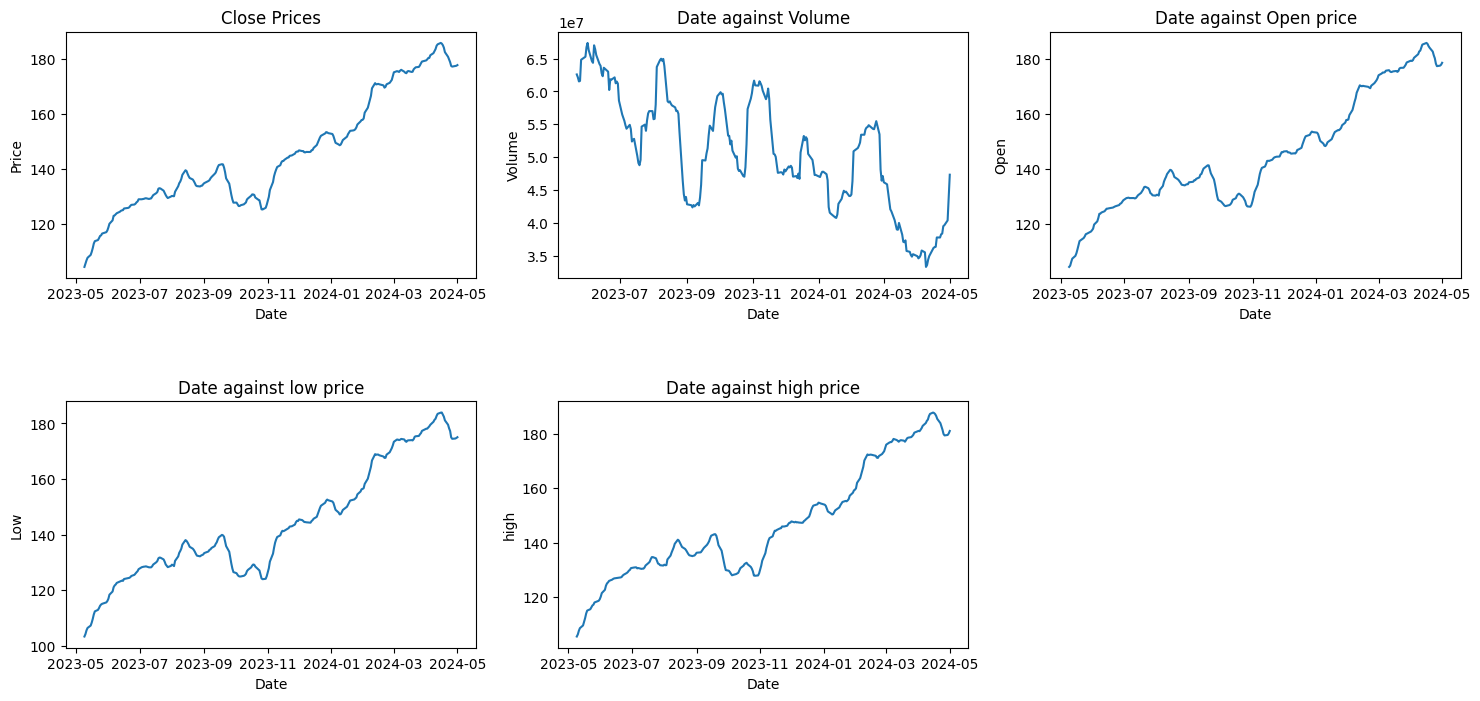

In [ ]:
df['Date'] = py.to_datetime(df['Date'])
df.set_index(['Date'],inplace=True)
print(type(df.index))
# Initialize one large figure to hold all subplots
plt.figure(figsize=(18, 8))  # Adjust overall figure size
plt.subplots_adjust(hspace=0.5) 



plt.subplot(2, 3, 1)  # 2 rows, 3 columns, position 1
plt.plot(df.index, df['SMA_7'])
plt.title('Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')



plt.subplot(2, 3, 2)  # 2 rows, 3 columns, position 1
plt.plot(df.index, df['SMA_7_volume'])
plt.title('Date against Volume')
plt.xlabel('Date')
plt.ylabel('Volume')



plt.subplot(2, 3, 3)  # 2 rows, 3 columns, position 1
plt.plot(df.index, df['SMA_7_open'])
plt.title('Date against Open price')
plt.xlabel('Date')
plt.ylabel('Open')


plt.subplot(2, 3, 4)  # 2 rows, 3 columns, position 1
plt.plot(df.index, df['SMA_7_low'])
plt.title('Date against low price')
plt.xlabel('Date')
plt.ylabel('Low')




plt.subplot(2, 3, 5)  # 2 rows, 3 columns, position 1
plt.plot(df.index, df['SMA_7_high'])
plt.title('Date against high price')
plt.xlabel('Date')
plt.ylabel('high')




<h3> Split into test and train datasets <h3>

In [ ]:
split_percentage = 0.80
split_index = int(len(df) * split_percentage)
df_train = df.iloc[:split_index]
df_test =  df.iloc[split_index:]
print(len(df_train))


202


<h3> ACF AND PACF PLOT <h3>

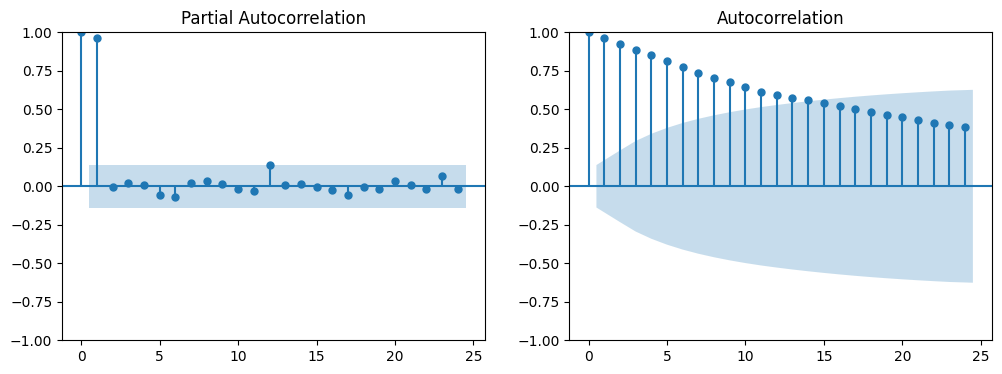

                 Close
Date                  
2023-05-01  102.050003
2023-05-02  103.629997
2023-05-03  103.650002
2023-05-04  104.000000
2023-05-05  105.660004
...                ...
2024-02-12  172.339996
2024-02-13  168.639999
2024-02-14  170.979996
2024-02-15  169.800003
2024-02-16  169.509995

[202 rows x 1 columns]


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf ,plot_pacf
df_train = df_train[[ 'Close']]
df_test = df_test[[ 'Close']]
df_train.index = pd.DatetimeIndex(df_train.index).to_period('D')
df_test.index = pd.DatetimeIndex(df_test.index).to_period('D')
plt.figure(figsize=(12, 4)) 
plt.subplot(1, 2, 1) 
plot_pacf(df_train, ax=plt.gca())  
plt.subplot(1, 2, 2) 
plot_acf(df_train, ax=plt.gca())  
plt.show()  #
print(df_train)

<h3> Make it stationary <h3>

<Axes: xlabel='Date'>

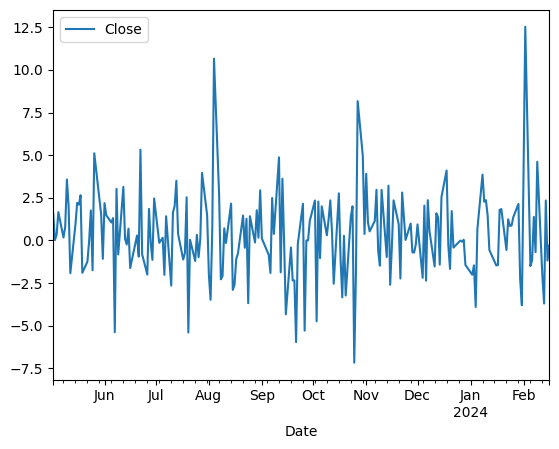

In [ ]:
df_train_stationary =  df_train.diff().dropna()
df_train_stationary.plot()


<h3> Plotting  the  Auto and Partial Correlation functions after making the dataset stationary <h3>

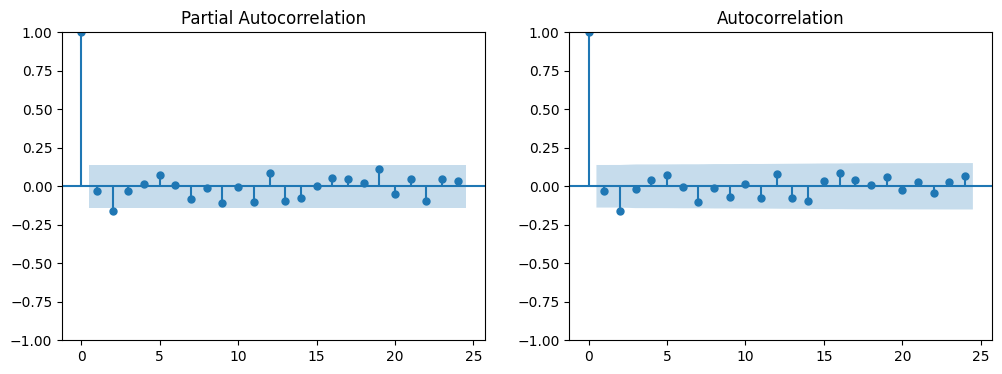

In [ ]:
plt.figure(figsize=(12, 4)) 
plt.subplot(1, 2, 1) 
plot_pacf(df_train_stationary, ax=plt.gca())  
plt.subplot(1, 2, 2) 
plot_acf(df_train_stationary, ax=plt.gca())  
plt.show()  #

In [ ]:

#The pacf and acf plots proves that time series was succesfully transformed into stationary  time series 
#with first-order differencing so we determined the d value for our Arima model.


<h2 style='font_family :'Sans' > Using the Arima model <h2>

In [ ]:
import pmdarima as pm
auto_arima = pm.auto_arima(df_train['Close'],stepwise=False,seasonal=False)
auto_arima

ARIMA(order=(2, 1, 0), scoring_args={}, suppress_warnings=True)

In [ ]:
# trying to find optimal parameters  automatically failed

<h3> Fitting the model <h3>

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA (df_train['Close'],order = (1,2,3))
model_fit =  model.fit()


<h3> Plotting the residual graph <h3>

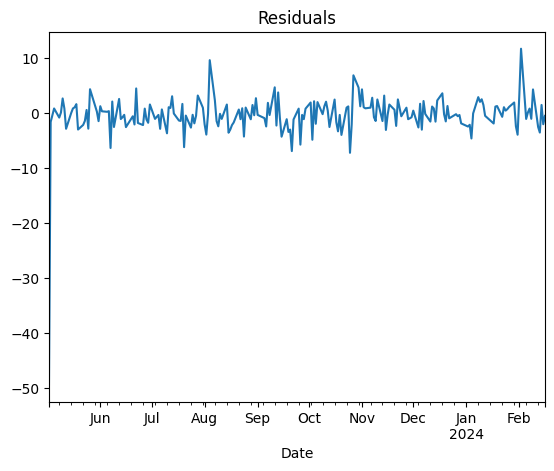

In [ ]:
residuals =  model_fit.resid[1:]
residuals.plot(title='Residuals')
plt.show()



<h3> Plotting the  predicted vs actual  closing prices <h3>

<class 'pandas.core.indexes.period.PeriodIndex'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Close             mean    mean_se  mean_ci_lower  mean_ci_upper
2024-02-20  170.146502   2.522585     165.202326     175.090678
2024-02-21  170.545716   3.521869     163.642980     177.448452
2024-02-22  170.881393   4.103677     162.838334     178.924452
2024-02-23  171.217831   4.619338     162.164094     180.271567
2024-02-24  171.554259   5.087184     161.583561     181.524957
2024-02-25  171.890688   5.519408     161.072847     182.708529
2024-02-26  172.227116   5.923811     160.616660     183.837573
2024-02-27  172.563545   6.305750     160.204503     184.922587
2024-02-28  172.899974   6.669083     159.828811     185.971137
2024-02-29  173.236402   7.016703     159.483916     186.988888
2024-03-01  173.572831   7.350839     159.165451     187.980211
2024-03-02  173.909259   7.673253     158.869960     188.948558
2024-03-03 

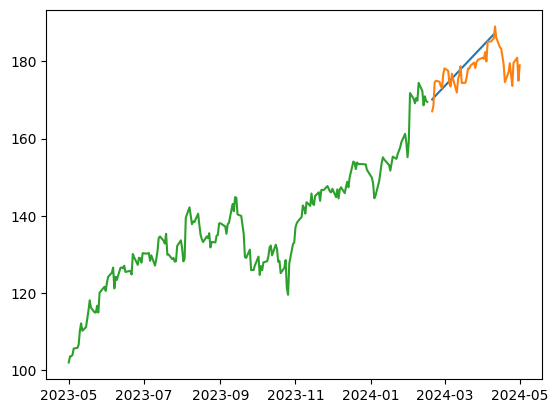

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# If df_train or df_test has a PeriodIndex, convert to Timestamp
# Calculate the number of steps for forecasting based on the test set length
num_steps = len(df_test)  # Assuming df_test index is already converted to Timestamp
df_test.index = df_test.index.to_timestamp()
df_train.index = df_train.index.to_timestamp()


forecast_result = model_fit.get_forecast(steps=num_steps)
forecast_df = forecast_result.summary_frame()
print(type(forecast_df.index))

date_range = pd.date_range(start=df_test.index[0],periods=51 )
in_sample_pred = model_fit.predict(start=df_train.index[1], periods=203, dynamic=False)
forecast_df.index = forecast_df.index.to_timestamp()
in_sample_pred.index =  in_sample_pred.index.to_timestamp()
forecast_df.index = date_range

print(type(forecast_df.index))
print(type(in_sample_pred.index))


plt.plot(forecast_df['mean'])
plt.plot(df_test)
plt.plot(df_train)

print(forecast_df)
print(df_test)